In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import itertools
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from IPython.display import Image
from statsmodels.tsa.seasonal import seasonal_decompose

# Load in weather data from 2011-2022
Read in yearly weather data dataframes for each year.  
Create one dataframe containing all of the data.  
And a dictionary containing the data for each year

In [4]:
all_years_weather_df = pd.DataFrame(None)
all_years_weather_dict = {}
for year in range(2011, 2022+1):
    # Read in data
    this_years_weather = pd.read_csv('../Cleaned_data/weather_data_{}.csv'.format(year), index_col= 'datetime')
    # Set the datetime as the index
    this_years_weather.index=pd.to_datetime(this_years_weather.index)
    # Create a new variable specifying the day number in the year
    this_years_weather['day_no'] = this_years_weather.index.day
    # this_years_weather.set_index('day_no', inplace = True, drop = True)
    # Add this year's weather to a dataframe which will store the data across all the year
    all_years_weather_df = all_years_weather_df.append(this_years_weather)
    # Add also to dictionary an entry for this year
    all_years_weather_dict[year] = this_years_weather

## Plot weather variables for one year

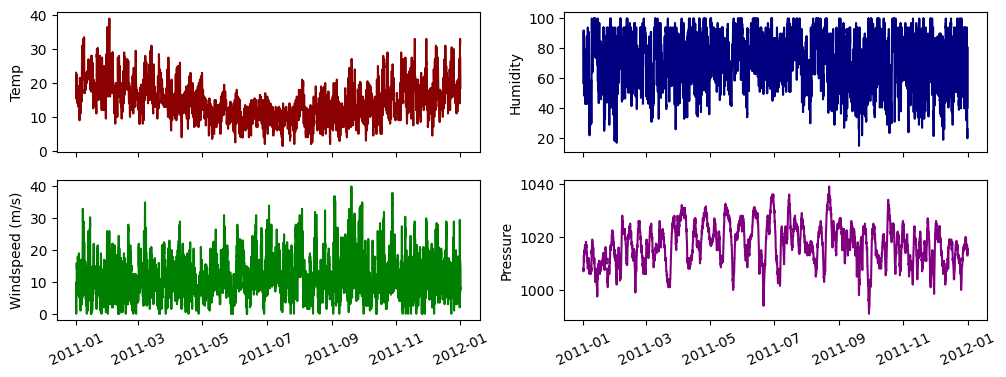

In [88]:
this_years_weather = all_years_weather_dict[2011]
this_years_weather
fig,axs = plt.subplots(2,2, figsize = (12,4), sharex = True)
axs[0,0].plot(this_years_weather.index,this_years_weather['Temp'], color = 'darkred')
axs[0,0].set_ylabel("Temp")
axs[0,1].plot(this_years_weather.index,this_years_weather['Humidity'], color = 'navy')
axs[0,1].set_ylabel("Humidity")
axs[1,0].plot(this_years_weather.index,this_years_weather['WindSpeed'], color = 'green')
axs[1,0].tick_params(axis='x', labelrotation= 25 )
axs[1,0].set_ylabel("Windspeed (m/s)")
axs[1,1].plot(this_years_weather.index,this_years_weather['Pressure'], color = 'purple')
axs[1,1].tick_params(axis='x', labelrotation= 25 )
axs[1,1].set_ylabel("Pressure")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)

## Compare weather variables for two years

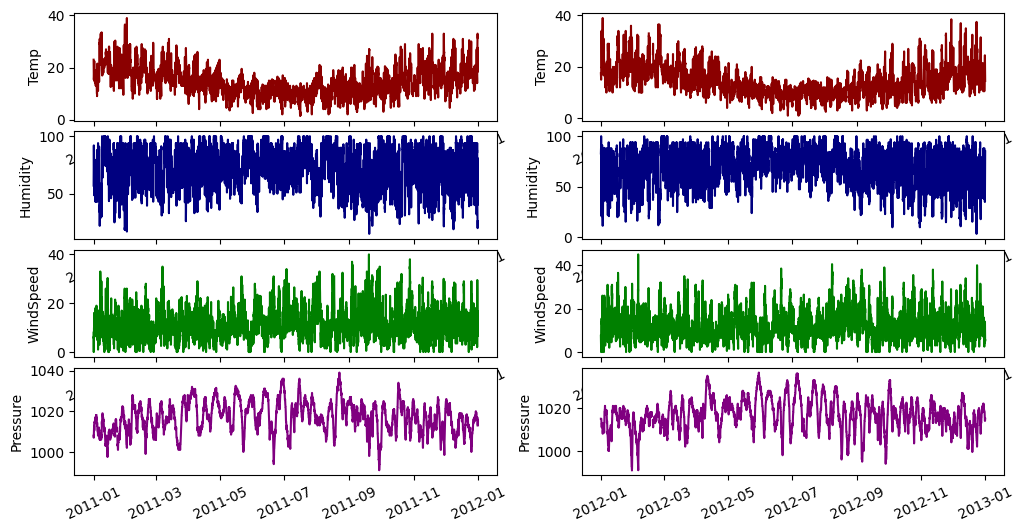

In [89]:
this_years_weather = all_years_weather_dict[2011]
this_years_weather
fig,axs = plt.subplots(4,2, figsize = (12,6))
axs[0,0].plot(all_years_weather_dict[2011].index,all_years_weather_dict[2011]['Temp'], color = 'darkred')
axs[0,0].set_ylabel("Temp")
axs[0,0].tick_params(axis='x', labelrotation= 25 )
axs[0,1].plot(all_years_weather_dict[2012].index,all_years_weather_dict[2012]['Temp'], color = 'darkred')
axs[0,1].set_ylabel("Temp")
axs[0,1].tick_params(axis='x', labelrotation= 25 )

axs[1,0].plot(all_years_weather_dict[2011].index,all_years_weather_dict[2011]['Humidity'], color = 'navy')
axs[1,0].set_ylabel("Humidity")
axs[1,0].tick_params(axis='x', labelrotation= 25 )
axs[1,1].plot(all_years_weather_dict[2012].index,all_years_weather_dict[2012]['Humidity'], color = 'navy')
axs[1,1].set_ylabel("Humidity")
axs[1,1].tick_params(axis='x', labelrotation= 25 )

axs[2,0].plot(all_years_weather_dict[2011].index,all_years_weather_dict[2011]['WindSpeed'], color = 'green')
axs[2,0].set_ylabel("WindSpeed")
axs[2,0].tick_params(axis='x', labelrotation= 25 )
axs[2,1].plot(all_years_weather_dict[2012].index,all_years_weather_dict[2012]['WindSpeed'], color = 'green')
axs[2,1].set_ylabel("WindSpeed")
axs[2,1].tick_params(axis='x', labelrotation= 25 )

axs[3,0].plot(all_years_weather_dict[2011].index,all_years_weather_dict[2011]['Pressure'], color = 'purple')
axs[3,0].set_ylabel("Pressure")
axs[3,0].tick_params(axis='x', labelrotation= 25 )
axs[3,1].plot(all_years_weather_dict[2012].index,all_years_weather_dict[2012]['Pressure'], color = 'purple')
axs[3,1].set_ylabel("Pressure")
axs[3,1].tick_params(axis='x', labelrotation= 25 )

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)